In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

from sklearn.model_selection import train_test_split

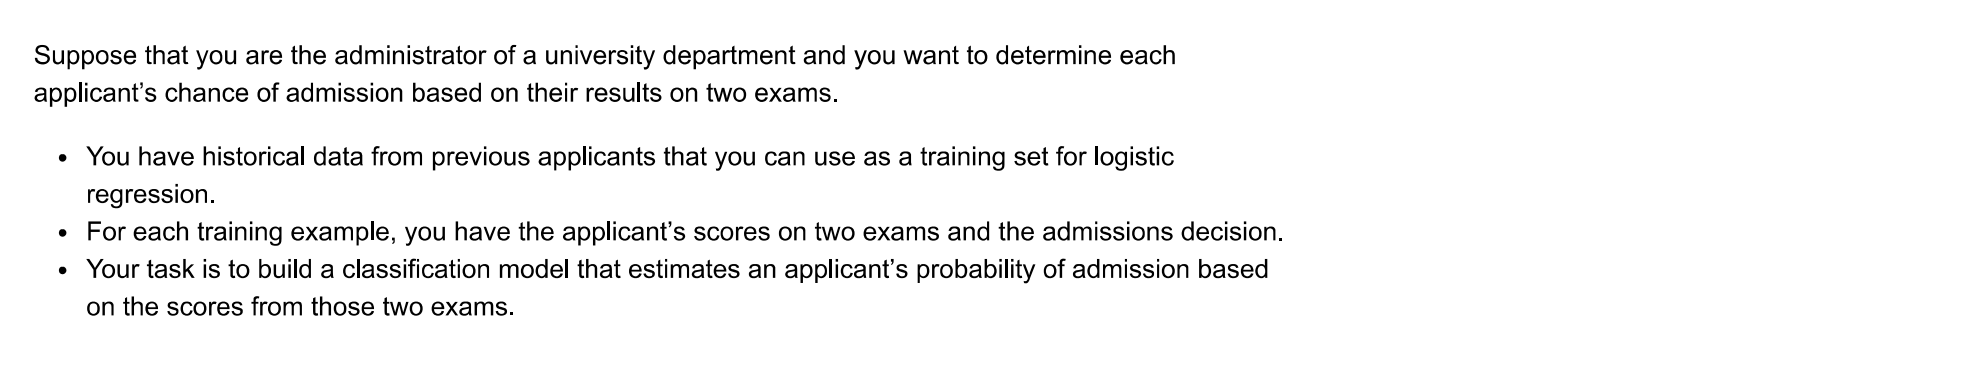


### Load and split data

In [72]:
column_names = ["Exam 1 score", "Exam 2 score", "Admission"]
data = pd.read_csv("../data/3_08/ex2data1.csv", header=None, names=column_names)
data.head()

,Exam 1 score,Exam 2 score,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [73]:
# split the data into features and target var
X = np.array(data.loc[:, ["Exam 1 score", "Exam 2 score"]])   # features
y = np.array(data.loc[:,"Admission"])   # target

In [74]:
# split the data into trainin and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: ", X_test.shape, y_test.shape)

Training set shape:  (80, 2) (80,)
Testing set shape:  (20, 2) (20,)


### Visualize data

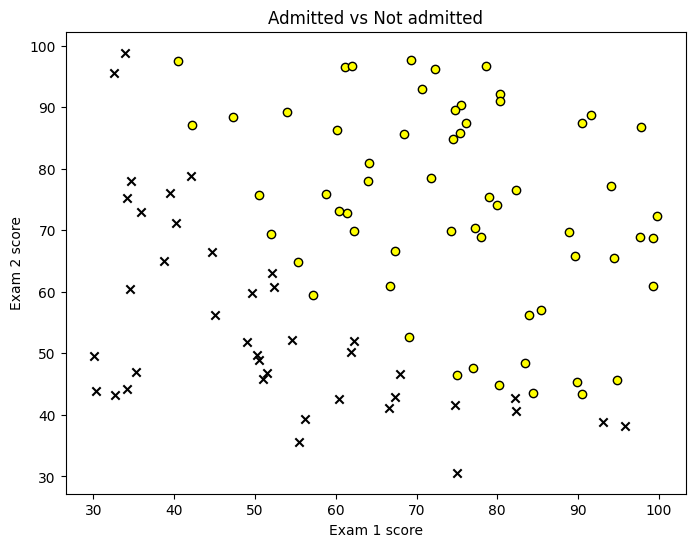

In [75]:
admitted = data[data["Admission"] == 1]
not_admitted = data[data["Admission"] == 0]

plt.figure(figsize=(8, 6))
plt.scatter(admitted["Exam 1 score"], admitted["Exam 2 score"], c='yellow', edgecolors='black', marker='o', label='Admitted')
plt.scatter(not_admitted["Exam 1 score"], not_admitted["Exam 2 score"], c='black', marker='x', label='Not Admitted')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title("Admitted vs Not admitted")
plt.show()

### Logistic regression form scratch

In [76]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    '''
    g = 1 / (1 + np.exp(-z))
    return g


def compute_cost(X, y, w, b):
    '''
    Compute the cost over all samples
    '''
    m, n = X.shape
    loss = 0

    for i in range(m):
        fwb = sigmoid(np.dot(w, X[i]) + b)
        loss += (-y[i]) * np.log(fwb) - (1 - y[i]) * np.log(1 - fwb) 

    total_cost = loss / m
    return total_cost
    
    
def compute_gradient(X, y, w, b):
    '''
    Compute the gradient of logistic regression\
    '''
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
        dj_db += err_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db


def gradient_descent(X, y, w, b, cost_func, gradient_func, alpha, iters):   
    '''
    Perforrms gradient descent to learn model parameters
    '''
    m = len(X)
    J_history = []
    w_history = []

    for i in range (iters):
        # Calculate gradient 
        dj_dw, dj_db = gradient_func(X, y, w, b)

        # Update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost at each iteration
        cost = cost_func(X, y, w, b)
        J_history.append(cost)
            
        # Print cost at every iters/10th iteration:
        if i % math.ceil(iters / 10) == 0 or i == (iters - 1):
            w_history.append(w)
            print(f"Iteration {i:4}: cost = {float(J_history[-1]):8.2f} ")
            
    return w, b, J_history, w_history
    

### Training the model

####  Small random initial weights $w$
* Small weights mean the features barely influence the prediction at the start.
* * np.random.seed(1) ensures the same "random" weights are generated every time the code runs.
* * np.random.rand(2) generates two values in the range [0, 1), one for each feature (Exam 1, Exam 2). Multiplying by 0.05 scales them down to [0, 0.05).
* Prevents saturation of the sigmoid activation early on (depending on bias value).
* * Saturation of the sigmoid refers to when its input $𝑧$ becomes very large or very small, causing the output to approach 1 or 0 and the gradient to become nearly zero, which slows or stops learning. 
* Keeps the model initially unbiased and stabilize training.
* This is standard practice in training logistic or neural models.

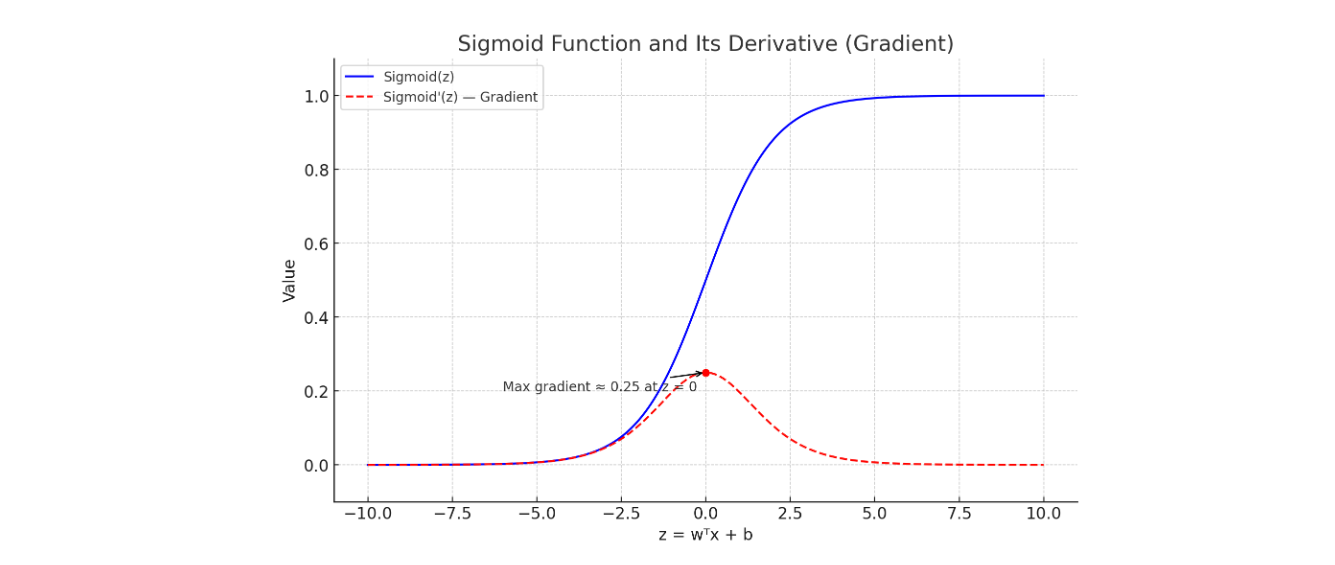
<p style="text-align:center">The gradient is largest at z=0 (about 0.25) and drops off sharply as z moves away from 0.</p>

#### Small negative bias $b$
* Bias controls the baseline logit (output before considering features).
* σ(−1) = $\frac{1}{1 + e^{-z}}$ ≈ 0.2689  is a low-to-moderate confidence in class 0 (Not Admitted).
* This allows the model to be less biased and more responsive to feature values right from the start. 

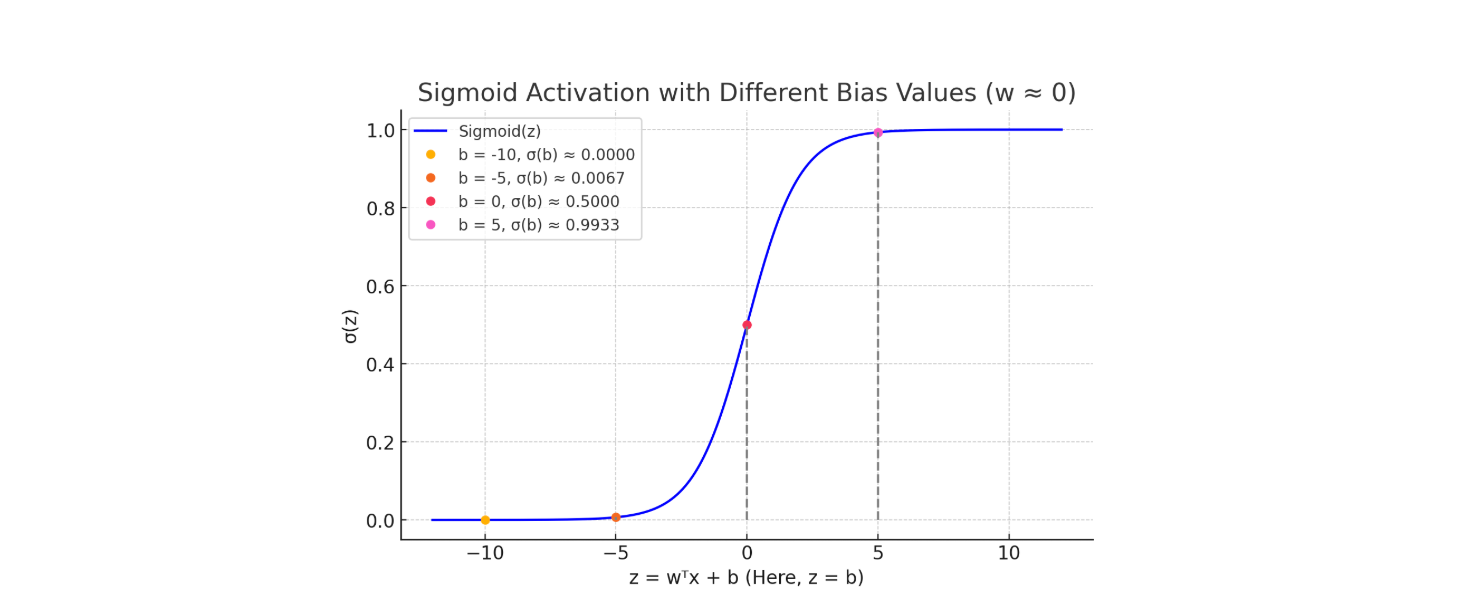 


In [153]:
np.random.seed(1) 
w_init = 0.05 * np.random.rand(2)
b_init = -1
print(f"w_init = {w_init}, b_init = {b_init}")
 
iters = 100000
alpha = 0.001
w_final, b_final, J_history, w_history = gradient_descent(X, y, w_init, b_init, compute_cost, compute_gradient, alpha, iters)
print(f"w_final = {w_final}, b_final = {b_final}")

w_init = [0.0208511  0.03601622], b_init = -1
Iteration    0: cost =     0.58 
Iteration 10000: cost =     0.53 
Iteration 20000: cost =     0.50 
Iteration 30000: cost =     0.48 
Iteration 40000: cost =     0.45 
Iteration 50000: cost =     0.44 
Iteration 60000: cost =     0.42 
Iteration 70000: cost =     0.41 
Iteration 80000: cost =     0.39 
Iteration 90000: cost =     0.38 
Iteration 99999: cost =     0.37 
w_final = [0.0489881  0.04204542], b_final = -5.301539763128775


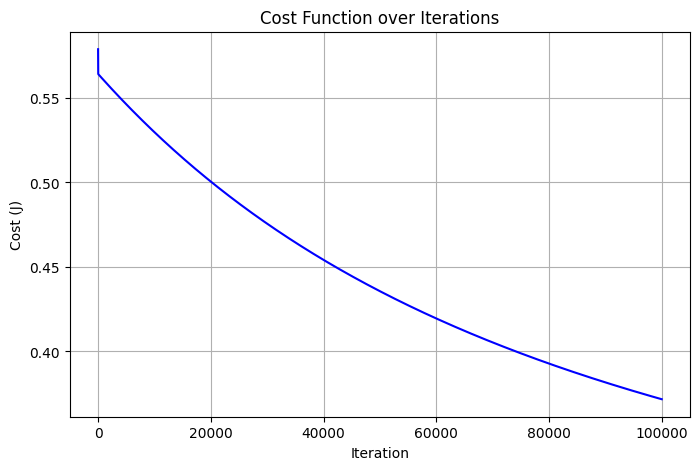

In [149]:
# Plot cost values from gradient descent run
plt.figure(figsize=(8, 5))
plt.plot(range(len(J_history)), J_history, color='blue')
plt.xlabel("Iteration")
plt.ylabel("Cost (J)")
plt.title("Cost Function over Iterations")
plt.grid(True)
plt.show()

### Plot decision boundary 

* The model has two featrues, therefore $f_{w,b}(x) = w_1x_1 + w_2x_2 + b$
* The decision boundary is given by the equation: $w_1x_1 + w_2x_2 + b = 0$
  <br> which rearranges to: $x_2 = -\frac{w_0}{w_1}x_1 - \frac{b}{w_1}$ 

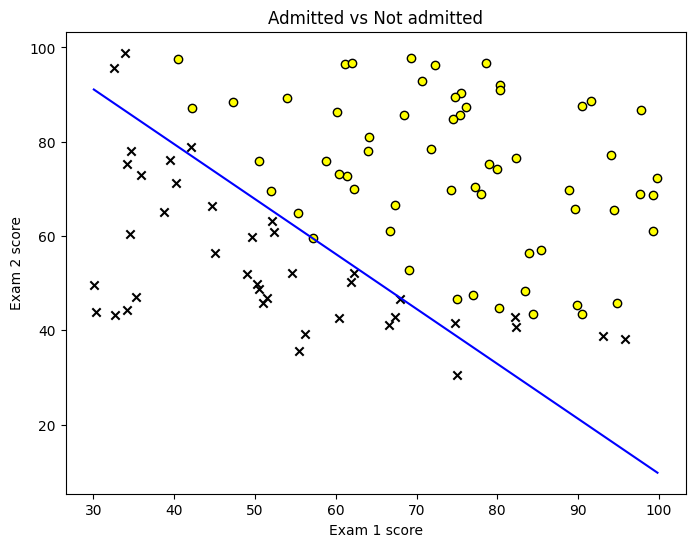

In [156]:

admitted = data[data["Admission"] == 1]
not_admitted = data[data["Admission"] == 0]

plt.figure(figsize=(8, 6))
plt.scatter(admitted["Exam 1 score"], admitted["Exam 2 score"], c='yellow', edgecolors='black', marker='o', label='Admitted')
plt.scatter(not_admitted["Exam 1 score"], not_admitted["Exam 2 score"], c='black', marker='x', label='Not Admitted')

x_vals = np.array([data["Exam 1 score"].min(), data["Exam 1 score"].max()])  # x_1
y_vals = (-1. / w_final[1]) * (w_final[0] * x_vals + b_final)  # x_2
plt.plot(x_vals, y_vals, c='blue', label='Decision Boundary') 

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title("Admitted vs Not admitted")
plt.show()

### Logistic regression with scikit-learn

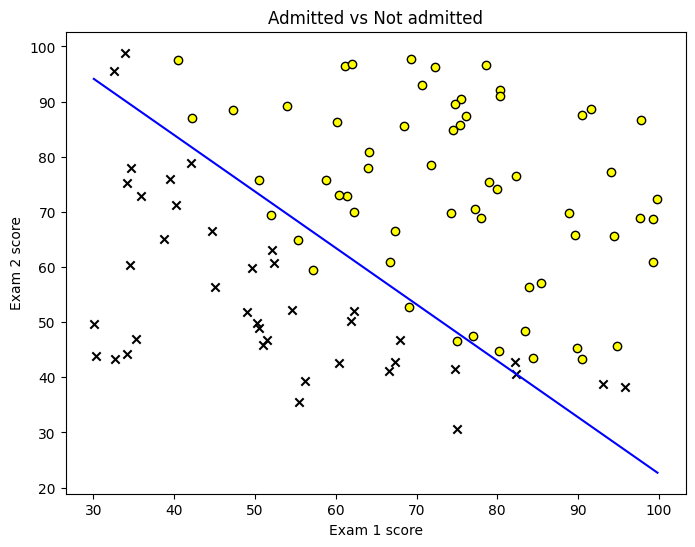

In [158]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(admitted["Exam 1 score"], admitted["Exam 2 score"], c='yellow', edgecolors='black', marker='o', label='Admitted')
plt.scatter(not_admitted["Exam 1 score"], not_admitted["Exam 2 score"], c='black', marker='x', label='Not Admitted')

# Decision boundary: y = (-w1*x1 - b)/w2
w = lr_model.coef_[0]
b = lr_model.intercept_[0]
x_vals = np.array([X[:, 0].min(), X[:, 0].max()])
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, label='Decision Boundary', c='blue')

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title("Admitted vs Not admitted")
plt.show()